# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [35]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [3]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [6]:
#your code here

spaceship.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [5]:
#your code here

spaceship.dropna(inplace=True)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [7]:
#your code here

spaceship['Cabin'] = spaceship['Cabin'].str[:1]

PassengerId and Name

In [8]:
#your code here

spaceship.drop(columns=['PassengerId', 'Name'], inplace=True)

- For non-numerical columns, do dummies.

In [9]:
#your code here

#spaceship_categorical = spaceship.select_dtypes('object').loc[:, spaceship.select_dtypes('object').columns]
#For non-numerical columns, do dummies encoding
spaceship = pd.get_dummies(spaceship, drop_first=True)


In [10]:
spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False


**Perform Train Test Split**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier

In [12]:
#your code here
features = spaceship.drop(columns='Transported')
target = spaceship['Transported']

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [15]:
#your code here

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state= 0 )

In [34]:
knn = KNeighborsRegressor(n_neighbors=15)

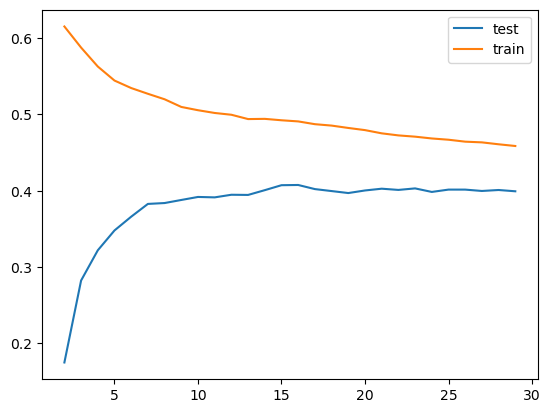

In [33]:
test_scores = []
train_scores = []
for i in range(2, 30):
    #training
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    #evaluate
    run_score_test = knn.score(X_test, y_test)
    run_score_train = knn.score(X_train, y_train)
    test_scores.append(run_score_test)
    train_scores.append(run_score_train)


plt.plot(range(2, 30), test_scores, label = "test")
plt.plot(range(2, 30), train_scores, label = "train")
plt.legend()
plt.show()

In [35]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [36]:
pred = knn.predict(X_test)

- Evaluate your model's performance. Comment it

In [39]:
#your code here
knn.score(X_test, y_test)

0.4072415532022188

In [38]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

print("------------------WITH RAW DATA---------------------------")
print("TEST SCORES----------------------")

pred = knn.predict(X_test)

print("r2 score: ", r2_score(y_test, pred))
print("root_mean_squared_error: ", root_mean_squared_error(y_test, pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, pred))

print("\nTRAIN SCORES----------------------")

pred = knn.predict(X_train)

print("r2 score: ", r2_score(y_train, pred))
print("root_mean_squared_error: ", root_mean_squared_error(y_train, pred))
print("mean_absolute_error: ", mean_absolute_error(y_train, pred))

------------------WITH RAW DATA---------------------------
TEST SCORES----------------------
r2 score:  0.4072415532022188
root_mean_squared_error:  0.3849540384246479
mean_absolute_error:  0.2760968229954614

TRAIN SCORES----------------------
r2 score:  0.4923931364812173
root_mean_squared_error:  0.35621797260534926
mean_absolute_error:  0.25264950794852387


In [25]:
### creating scaler and normalize the data

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [27]:
pd.DataFrame(X_train_scaled, columns= X_train.columns)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.220515,-0.347046,-0.282099,-0.305892,-0.271543,-0.271123,-0.583761,1.959293,1.353973,-0.322931,-0.31319,-0.248362,2.954847,-0.690210,-0.654300,-0.019459,-0.328263,0.677097,-0.163149
1,-1.704525,-0.347046,-0.282099,-0.305892,-0.271543,-0.271123,-0.583761,-0.510388,1.353973,-0.322931,-0.31319,-0.248362,-0.338427,-0.690210,1.528352,-0.019459,-0.328263,0.677097,-0.163149
2,0.083012,-0.347046,-0.143345,-0.305892,0.718070,-0.271123,-0.583761,-0.510388,-0.738567,-0.322931,-0.31319,-0.248362,-0.338427,1.448834,-0.654300,-0.019459,-0.328263,0.677097,-0.163149
3,-0.810757,-0.326846,-0.282099,0.654200,0.044548,-0.270259,-0.583761,1.959293,-0.738567,-0.322931,-0.31319,-0.248362,2.954847,-0.690210,-0.654300,-0.019459,-0.328263,0.677097,-0.163149
4,-0.191994,-0.347046,-0.282099,-0.305892,-0.271543,-0.271123,-0.583761,-0.510388,1.353973,-0.322931,-0.31319,-0.248362,-0.338427,-0.690210,1.528352,-0.019459,-0.328263,0.677097,-0.163149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,1.664295,-0.347046,-0.282099,-0.305892,-0.271543,-0.271123,-0.583761,1.959293,-0.738567,-0.322931,-0.31319,-0.248362,2.954847,-0.690210,-0.654300,-0.019459,-0.328263,0.677097,-0.163149
5280,0.495520,-0.347046,-0.282099,-0.305892,0.352887,-0.269396,-0.583761,-0.510388,-0.738567,-0.322931,-0.31319,-0.248362,-0.338427,1.448834,-0.654300,-0.019459,-0.328263,-1.476894,-0.163149
5281,0.495520,-0.347046,2.514160,-0.305892,6.461962,-0.188247,1.713031,-0.510388,-0.738567,-0.322931,-0.31319,4.026379,-0.338427,-0.690210,-0.654300,-0.019459,-0.328263,0.677097,-0.163149
5282,0.358017,-0.347046,-0.279748,-0.305892,0.318435,1.264664,1.713031,-0.510388,-0.738567,-0.322931,-0.31319,4.026379,-0.338427,-0.690210,-0.654300,-0.019459,-0.328263,0.677097,6.129384


In [43]:
knn_scaled = KNeighborsRegressor(n_neighbors=15)

In [44]:
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=15)

In [45]:
knn_scaled.score(X_test_scaled, y_test)

0.40652882837451665

In [46]:
knn_scaled.score(X_train_scaled, y_train)

0.4822181863265663

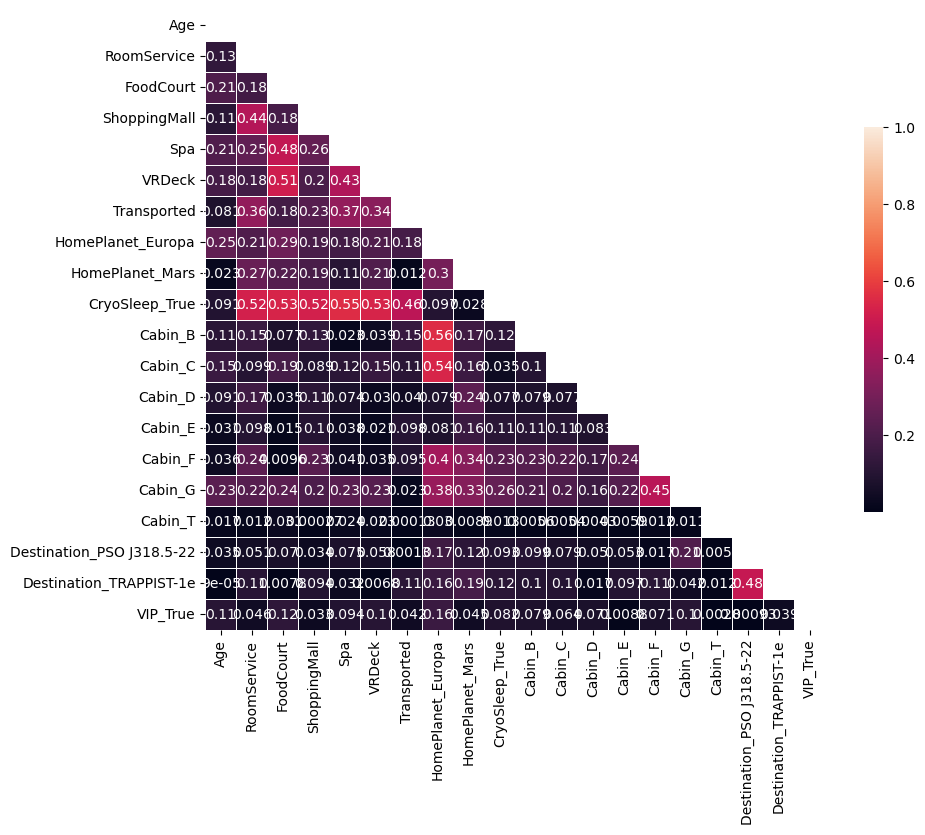

In [47]:
corr=np.abs(spaceship.corr(method = "spearman"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()